<a href="https://colab.research.google.com/github/Bortkivskiy/assignment-3-ml-algorithms-Bortkivskiy/blob/main/tasks3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Завантаження бібліотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

# Завантаження бібліотеки для поліфункціональної регресії (якщо буде потрібно)
from sklearn.preprocessing import PolynomialFeatures
from google.colab import files




Передбачення викидів CO₂

In [ ]:
from google.colab import files

# Завантажте файл із комп'ютера
uploaded = files.upload()


Saving CO2_emission.csv to CO2_emission (1).csv


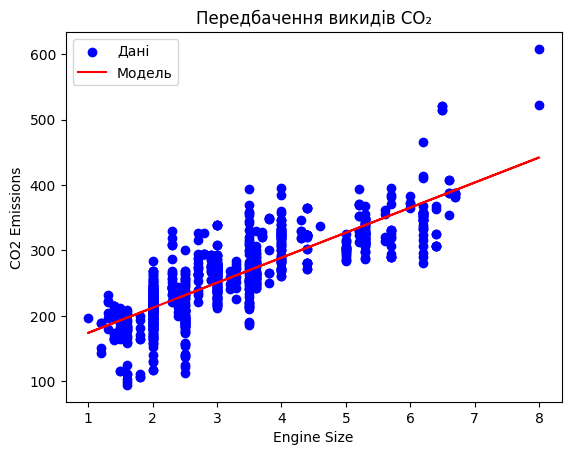

(array([38.32301106]), 135.3260546026322)

In [ ]:
def CO2_emissions(file_path):
    # Завантаження даних
    data = pd.read_csv(file_path)

    # Вибір ознак та цільової змінної
    X = data[['Engine_Size']]
    y = data['CO2_Emissions']

    # Створення та навчання моделі
    model = LinearRegression()
    model.fit(X, y)

    # Візуалізація даних та моделі
    plt.scatter(X, y, color='blue', label='Дані')
    plt.plot(X, model.predict(X), color='red', label='Модель')
    plt.xlabel('Engine Size')
    plt.ylabel('CO2 Emissions')
    plt.title('Передбачення викидів CO₂')
    plt.legend()
    plt.show()

    return model.coef_, model.intercept_

# Виклик функції з файлом CO2_emission.csv
CO2_emissions('CO2_emission.csv')


Продажі морозива

In [28]:
from google.colab import files

# Завантажте файл
uploaded = files.upload()



Saving ice_cream_selling_data.csv to ice_cream_selling_data (2).csv


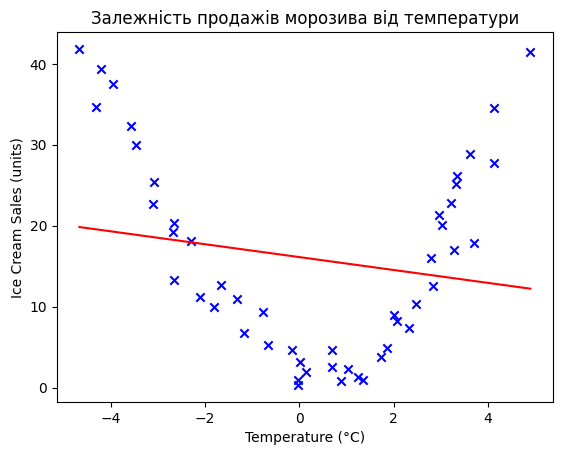

In [29]:
def ice_cream_selling(file_path):
    # Завантажуємо дані
    data = pd.read_csv(file_path)

    # Використовуємо правильні назви стовпців для температури і продажів
    plt.scatter(data['Temperature (°C)'], data['Ice Cream Sales (units)'], c='blue', marker='x')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Ice Cream Sales (units)')

    # Побудова регресійної моделі
    X = data[['Temperature (°C)']]
    y = data['Ice Cream Sales (units)']
    model = LinearRegression()
    model.fit(X, y)

    # Візуалізація моделі
    plt.plot(data['Temperature (°C)'], model.predict(X), color='red')
    plt.title("Залежність продажів морозива від температури")
    plt.show()
ice_cream_selling('ice_cream_selling_data.csv')


Споживання електроенергії

In [ ]:
from google.colab import files

# Завантаження файлу вручну
uploaded = files.upload()


Saving powerconsumption.csv to powerconsumption.csv


        Datetime  Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
0  1/1/2017 0:00        6.559      73.8      0.083                0.051   
1  1/1/2017 0:10        6.414      74.5      0.083                0.070   
2  1/1/2017 0:20        6.313      74.5      0.080                0.062   
3  1/1/2017 0:30        6.121      75.0      0.083                0.091   
4  1/1/2017 0:40        5.921      75.7      0.081                0.048   

   DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
0         0.119             34055.69620             16128.87538   
1         0.085             29814.68354             19375.07599   
2         0.100             29128.10127             19006.68693   
3         0.096             28228.86076             18361.09422   
4         0.085             27335.69620             17872.34043   

   PowerConsumption_Zone3  
0             20240.96386  
1             20131.08434  
2             19668.43373  
3             18899.27711  
4     

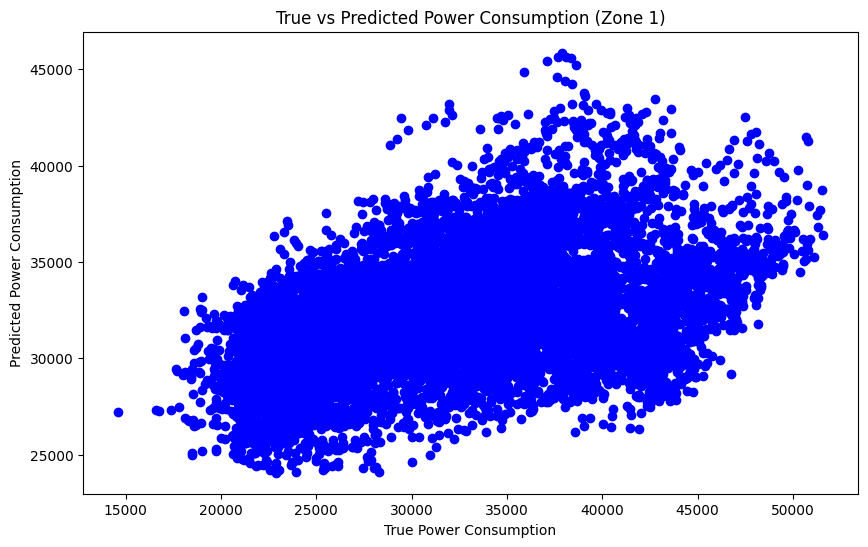

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Завантажуємо дані
data = pd.read_csv('/content/powerconsumption.csv')

# Перевіряємо перші кілька рядків та наявні стовпці
print(data.head())
print(data.columns)

# Вибір незалежних змінних (Temperature, Humidity, WindSpeed)
X = data[['Temperature', 'Humidity', 'WindSpeed']]

# Вибір залежної змінної (PowerConsumption_Zone1)
y = data['PowerConsumption_Zone1']

# Розділяємо дані на навчальні та тестові
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Створюємо модель лінійної регресії
model = LinearRegression()

# Навчаємо модель
model.fit(X_train, y_train)

# Робимо прогнози на тестових даних
y_pred = model.predict(X_test)

# Оцінка якості моделі
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Візуалізуємо модель
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('True Power Consumption')
plt.ylabel('Predicted Power Consumption')
plt.title('True vs Predicted Power Consumption (Zone 1)')
plt.show()


Передбачення серцевих захворювань

In [ ]:
from google.colab import files

# Завантаження файлу вручну
uploaded = files.upload()


Saving heart.csv to heart.csv


In [ ]:
from sklearn.linear_model import LogisticRegression

def heart_classification(file_path):
    # Завантаження даних
    data = pd.read_csv(file_path)

    # Вибір ознак та цільової змінної
    X = data.drop(columns=['output'])
    y = data['output']

    # Розподіл даних на тренувальну та тестову вибірки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Створення та навчання моделі
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Оцінка точності моделі
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f'Точність моделі: {accuracy:.2f}')
    return model.coef_, model.intercept_

# Виклик функції з файлом heart.csv
heart_classification('heart.csv')


Точність моделі: 0.81


(array([[ 0.00540694, -1.13481355,  0.80337705, -0.0077844 , -0.00201052,
          0.36229236,  0.61482153,  0.01753145, -1.03939131, -0.50651847,
          0.80042622, -1.04546069, -1.16197323]]),
 array([1.33918759]))